# Estadistica descriptiva

In [129]:
# Importar los paquetes que necesitaremos
import math
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from typing import List

Se tiene una muestra de 48 piezas hechas de una aleación de aluminio y litio para probar su resistencia a la tension y ver si sirve como material para fabricar un avión, se prueban y se anotan las libras por pulgada (psi) a las que aguantó cada pieza.

In [130]:
x = [
	105, 97, 245, 163, 207, 134, 221, 154,
	228, 131, 180, 178, 190, 76, 101, 142,
	149, 200, 186, 174, 199, 115, 87, 176,
	121, 120, 181, 160, 194, 160, 181, 170,
	237, 171, 172, 133, 180, 167, 176, 158,
	156, 229, 143, 141, 110, 133, 123, 146
]

Primero vamos a sacar alguna informacion basica

In [131]:
n = len(x)  # tamaño de muestra
minimo = min(x)  # dato mas chico de la muestra
maximo = max(x)  # dato mas grande de la muestra
rango = maximo - minimo
promedio = sum(x) / n
n, minimo, maximo, rango, promedio

(48, 76, 245, 169, 160.41666666666666)

Para sacar la **mediana** hay que ordenar de menor a mayor los datos y encontrar el dato que este justo en medio

In [132]:
# ordenar los datos
x_ordenado = sorted(x)
# ver si n es par o impar
# a n le restamos 1 porque las listas incluyen el 0 como primera posicion
if n % 2 == 0:
	# si es par
	mediana = (x_ordenado[int((n - 1) / 2)] + x_ordenado[int((n - 1) / 2) + 1]) / 2
else:
	# si es impar
	mediana = x_ordenado[int(((n - 1) + 1) / 2)]
mediana

161.5

Tambien puede ser sacada con una funcion que tiene el paquete numpy

In [133]:
mediana = np.median(x)
mediana

161.5

Para sacar la **moda**, nomas hay que buscar el dato que mas frecuencia tenga, si hay varios datos con igual frecuencia, ambos pueden ser la moda

In [134]:
moda = x[0]
counter = 0
for i in x:
	curr_frequency = x.count(i)
	if curr_frequency > counter:
		counter = curr_frequency
		moda = i
del i, counter, curr_frequency
moda

180

O bien, con una funcion que tiene el paquete de scipy.stats

In [135]:
moda = st.mode(x)
moda = moda.mode[0]
moda

133

Para sacar la **varianza**
* Primero se saca la resta de cada dato con el promedio y luego se eleva al cuadrado
* Luego se suman entre si los resultados de estas restas
* Luego se divide entre la resta de *n* y 1

OJO, cuando es una muestra se resta *n - 1*, cuando es una poblacion, a *n* no se le resta nada

In [136]:
sum([(i - promedio) ** 2 for i in x]) / (n - 1)

1566.9716312056742

Pero tambien existe esta funcion dentro del paquete de numpy

In [137]:
# como x es una muestra, se agrega el parametro ddof con valor 1 para que haga la resta de (n - 1) al dividir
varianza = np.var(x, ddof = 1)
varianza

1566.9716312056735

Para sacar la **desviacion estandar** nomas saque la raiz cuadrada de la varianza

In [138]:
# puede sacarse de estas dos maneras
varianza ** 0.5, math.sqrt(varianza)

(39.584992499755174, 39.584992499755174)

O bien, use la formula que incluye numpy

In [139]:
# aqui tambien ocupa el parametro ddof = 1
desv = np.std(x, ddof = 1)
desv

39.584992499755174

##### Cuartiles

Son los puntos de division que se le hacen al conjunto de datos ordenados de menor a mayor en partes iguales

In [140]:
# dividir sobre 4 el tamaño de la muestra
q1_pos = int(n / 4)
# para obtener la posicion del 2do cuartil
q2_pos = q1_pos * 2
q3_pos = q1_pos * 3

q1_pos, q2_pos, q3_pos

(12, 24, 36)

In [141]:
# ordenar los datos
x_ordenado = sorted(x)
# le restamos 1 porque las listas incluyen el 0 como primera posicion
# al otro dato no le restamos por lo mismo
q1 = (x_ordenado[q1_pos - 1] + x_ordenado[q1_pos]) / 2
q2 = (x_ordenado[q2_pos - 1] + x_ordenado[q2_pos]) / 2
q3 = (x_ordenado[q3_pos - 1] + x_ordenado[q3_pos]) / 2

del q1_pos, q2_pos, q3_pos
q1, q2, q3

(133.0, 161.5, 181.0)

numpy tambien tiene una funcion para sacar los cuartiles que quieras

In [142]:
# la funcion regresa un array asi que defina las variables de esta manera
q1, q2, q3 = np.quantile(x, [0.25, 0.5, 0.75])
q1, q2, q3

(133.0, 161.5, 181.0)

##### Percentiles

Son los conjuntos de datos ordenados divididos en 100 partes iguales.

* El percentil del 25% *P25 = Q1*
* El percentil del 50% *P50 = mediana = Q2*
* El percentil del 75% *P75 = Q3*

In [143]:
# funcion para redondear para arriba aunque haya decimales de .5 o menos
def round_up(n, decimals = 0):
	multiplier = 10 ** decimals
	return math.ceil(n * multiplier) / multiplier

# funcion para sacar los percentiles
def percentil(x, k):
	x = sorted(x)
	if k < 0: return min(x)
	if k > 100: return max(x)
	# convertir k en base a 1
	k = k / 100
	# encontrar la posicion i del percentil mediante el calculo de nk
	nk = len(x) * k

	# si nk es entero, i va a ser igual a nk + 0.5
	if isinstance(nk, int): i = nk + 0.5
	# si nk no es entero, entonces i es el siguiente entero mas grande
	else: i = int(round_up(nk))

	# si i es entero, se cuentan las observaciones desde la mas chica hasta hallar el i-esimo valor
	if isinstance(i, int): pk = x[i - 1]
	# si i no es entero, entonces contiene una fraccion igual a un medio, con lo que el valor de pk es el promedio de las observaciones ordenadas nk y nk + 1
	else: pk = (x[nk - 1] + x[nk]) / 2
	# OJO, a la posicion se le resta 1 porque las posiciones empiezan del 0

	return pk

In [144]:
def percentile(x, percent):
	if not x: return None
	if percent <= 0: return min(x)
	if percent >= 100: return max(x)

	x = sorted(x)
	percent = percent / 100

	k = (len(x) - 1) * percent
	f = math.floor(k)
	c = math.ceil(k)
	# key function to compute value from each element of x
	key = lambda x: x
	if f == c: return key(x[int(k)])
	d0 = key(x[int(f)]) * (c - k)
	d1 = key(x[int(c)]) * (k - f)
	return d0 + d1

In [145]:
# si queremos encontrar el percentil 10
p10 = percentile(x, 10)
# para encontrar el percentil 90
p90 = percentile(x, 90)
p10, p90

(108.5, 211.20000000000007)

o bien

In [146]:
p10 = np.percentile(x, 10)
p90 = np.percentile(x, 90)
p10, p90

(108.5, 211.20000000000005)

##### Sesgo (o asimetria)

Si los datos están sesgados, su media, mediana y moda son diferentes.
* Si la *moda = mediana = media* la distribución es simétrica.
* Si la *moda < mediana < media* la distribución esta sesgada a la derecha o tiene sesgo positivo.
* Si la *moda > mediana > media* la distribución esta sesgada a la izquierda o tiene sesgo negativo.

##### Curtosis

Hay 3 tipos de curtosis para las distribuciones de datos:
* Si *Cu > 0* es Leptocúrtica. Hay mucha concentración de datos en la media.
* Si *Cu = 0* es Mesocúrtica. Tiene una distribución normal.
* Si *Cu < 0* es Platicúrtica. Hay muy poca concentración de datos en la media.

In [147]:
# para sacar el sesgo y la curtosis
sesgo = (q1 + q3 - (2 * q2)) / (q3 - q1)
curtosis = (q3 - q1) / (2 * (p90 - p10))
sesgo, curtosis

(-0.1875, 0.23369036027263865)

In [148]:
sesgo = st.skew(x)
curtosis = st.kurtosis(x)
sesgo, curtosis

(0.041022031309098095, -0.4047075284407926)

Hay un dato que se llama **error tipico** o **error estandar**.
Este vendria siendo parte del margen de error que se calcula para encontrar el promedio poblacional.
Se halla dividiendo la desviación estandar entre la raíz cuadrada del tamaño de la muestra.

In [149]:
error_tipico = desv / (n ** 0.5)
error_tipico

5.713601518900742

Acomodamos todo para presentar la estadistica descriptiva de los datos

In [150]:
pd.DataFrame(
	data = {'valor': [n, minimo, maximo, rango, promedio, mediana, moda, varianza, desv, q1, q2, q3, sesgo, curtosis, error_tipico]},
	index = ['n', 'minimo', 'maximo', 'rango', 'promedio', 'mediana', 'moda', 'varianza', 'desv', 'Q1', 'Q2', 'Q3', 'sesgo', 'curtosis',
			 'error tipico']
)

,valor
n,48.000000
minimo,76.000000
maximo,245.000000
rango,169.000000
promedio,160.416667
mediana,161.500000
moda,133.000000
varianza,1566.971631
desv,39.584992
Q1,133.000000


O bien, puede usar una de estas funciones

In [151]:
st.describe(x)

DescribeResult(nobs=48, minmax=(76, 245), mean=160.41666666666666, variance=1566.9716312056735, skewness=0.041022031309098095, kurtosis=-0.4047075284407926)

In [152]:
pd.DataFrame(x).describe()

,0
count,48.000000
mean,160.416667
std,39.584992
min,76.000000
25%,133.000000
50%,161.500000
75%,181.000000
max,245.000000


#### Histograma

Suelen ser para presentar frecuencias

El eje horizontal es donde va la escala de la variable que se anda observando
El eje vertical es para representar la escala de las frecuencias

In [153]:
# la regla de sturges nos dice la mejor cantidad de clases a las que agrupamos los datos
sturges = int(round(1 + 3.322 * math.log(n, 10), 0))
sturges

7

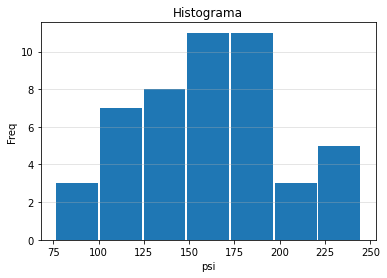

In [154]:
plt.hist(x, bins = sturges, rwidth = 0.96)
plt.grid(axis = 'y', alpha = 0.4)
plt.title('Histograma')
plt.xlabel('psi')
plt.ylabel('Freq')
plt.show()
del sturges

#### Diagrama de caja

Estos diagramas contienen:
* los 3 cuartiles
* el valor minimo y maximo de los datos
* valores atipicos

El rectangulo abarca el *rango intercuartilico*, o sea
* *Q1* la linea de abajo
* *Q2 = P50 = mediana* la linea de enmedio
* *Q3* la linea de arriba

Las patas de arriba y abajo son la longitud desde los cuartiles a sus valores maximo y minimo, los valores atipicos se muestran con un punto

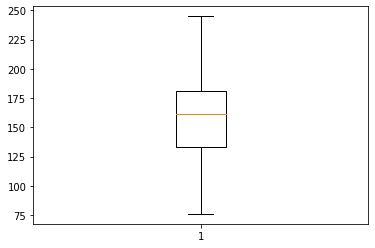

In [155]:
plt.boxplot(x)
plt.show()

#### Graficas de series de tiempo

Su eje horizontal es el tiempo, ya sea medido en años, segundos, etc.

Su eje vertical es la variable que se anda observando

Suponiendo que el orden de las resistencias esta a como se tuvieron con el tiempo

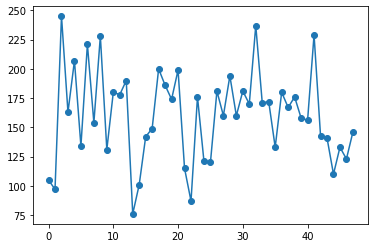

In [156]:
plt.plot(range(n), x, 'o-')
plt.show()